In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("Books_dataset.csv")
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
print(df.columns)

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')


In [5]:
print(len(df.columns))

25


In [6]:
print(df.describe())

             rating    numRatings  likedPercent      bbeScore      bbeVotes
count  52478.000000  5.247800e+04  51856.000000  5.247800e+04  52478.000000
mean       4.021878  1.787865e+04     92.231545  1.984023e+03     22.529003
std        0.367146  1.039448e+05      5.990689  3.515314e+04    369.158541
min        0.000000  0.000000e+00      0.000000  0.000000e+00     -4.000000
25%        3.820000  3.410000e+02     90.000000  8.400000e+01      1.000000
50%        4.030000  2.307000e+03     94.000000  9.700000e+01      1.000000
75%        4.230000  9.380500e+03     96.000000  1.870000e+02      2.000000
max        5.000000  7.048471e+06    100.000000  2.993816e+06  30516.000000


We dont need all the columns for our recommendation system, so we are going to remove columns which or not adding value to the model.

In [7]:
drop_columns = ['bookId','series','isbn','characters', 'bookFormat', 'edition','publisher', 'publishDate', 'firstPublishDate', 'awards',
                'ratingsByStars','setting', 'coverImg','price']

In [8]:
df = df.drop(drop_columns, axis = 1)
df.head()

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,6376780,96.0,2993816,30516
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,2507623,98.0,2632233,26923
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,4501075,95.0,2269402,23328
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,2998241,94.0,1983116,20452
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,4964519,78.0,1459448,14874


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         52478 non-null  object 
 1   author        52478 non-null  object 
 2   rating        52478 non-null  float64
 3   description   51140 non-null  object 
 4   language      48672 non-null  object 
 5   genres        52478 non-null  object 
 6   pages         50131 non-null  object 
 7   numRatings    52478 non-null  int64  
 8   likedPercent  51856 non-null  float64
 9   bbeScore      52478 non-null  int64  
 10  bbeVotes      52478 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.4+ MB
None


In [10]:
print(df.isna().sum())

title              0
author             0
rating             0
description     1338
language        3806
genres             0
pages           2347
numRatings         0
likedPercent     622
bbeScore           0
bbeVotes           0
dtype: int64


In [11]:
print(len(df))

52478


As we can see we are missing really low amount of data like max 4000 data. we can easly populate it with mean data or we can drop based on the amount of missing values, so in our next step we are going to handle missing Values.

In [12]:
#Since Description is something which can not be populated using mean or another values we are going to replace it with NA
df["description"] = df["description"].fillna("NA")

In [13]:
#Now lets take care of language we are going to replace the missing values with Unknow values since its an language its not not going to play major role
df["language"] = df["language"].fillna("Unknow")

In [14]:
#For now lets replace the null values with 100 pages 
df["pages"] = df["pages"].fillna("100")

In [15]:
#Since the likedPrecent is really low i.e 600 out of 50k  we are going to drop it 
df = df.dropna(subset = ["likedPercent"])

In [16]:
print(df.isna().sum())

title           0
author          0
rating          0
description     0
language        0
genres          0
pages           0
numRatings      0
likedPercent    0
bbeScore        0
bbeVotes        0
dtype: int64


In [17]:
df.head()

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,6376780,96.0,2993816,30516
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,2507623,98.0,2632233,26923
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,4501075,95.0,2269402,23328
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,2998241,94.0,1983116,20452
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,4964519,78.0,1459448,14874


In [18]:
pd.set_option("display.max_colwidth", None)

In [19]:
# As you can see the genres are wrapped inside of an array od string lets take care of it
def genres_preprocess(each_data):
    return each_data[1:-1]
df["genres"] = df["genres"].apply(genres_preprocess)

In [20]:
df.head()

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes
0,The Hunger Games,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,"'Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action'",374,6376780,96.0,2993816,30516
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.",English,"'Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy'",870,2507623,98.0,2632233,26923
2,To Kill a Mockingbird,Harper Lee,4.28,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.",English,"'Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Novels', 'Read For School', 'High School'",324,4501075,95.0,2269402,23328
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England.",Eng

Now we have to deal with the author column. Below we will see what are the problem are in that columns and how we can solve them 

In [21]:
len(df.groupby(df["author"]))

27853

As you can see we have around 28K of authors we should take a deep look inside of the column to get better understanding

In [22]:
df["author"][20:55]

20                                                                                                       Ray Bradbury
21                                                                                   Veronica Roth (Goodreads Author)
22                                                                                                    William Golding
23           William Shakespeare, Paul Werstine (Editor), Barbara A. Mowat (Editor), Paavo Emil Cajander (Translator)
24                       Paulo Coelho (Goodreads Author), Alan R. Clarke (Translator), James Noel Smith (Illustrator)
25                                                                      Fyodor Dostoyevsky, David McDuff (Translator)
26                                                                                                    Stephen Chbosky
27                                                                      F. Scott Fitzgerald, Francis Scott Fitzgerald
28                                                      

We've discovered that the author field often includes not just the author's name but also mentions of editors, illustrators, or even book titles. After research, we've identified that the first name listed typically refers to the main author. Additionally, in some entries, book titles appear in the bracket, which could introduce bias during model training. To ensure clean and consistent data, we will extract only the first name as the primary author and remove any unrelated or noisy information.

In [23]:
df["title"][52]

'The Odyssey'

In [24]:
df["author_alone"] = df["author"].apply(lambda x : x.split(",")[0].strip() if isinstance(x,str) else x)

In [25]:
df.head()

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes,author_alone
0,The Hunger Games,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,"'Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action'",374,6376780,96.0,2993816,30516,Suzanne Collins
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.",English,"'Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy'",870,2507623,98.0,2632233,26923,J.K. Rowling
2,To Kill a Mockingbird,Harper Lee,4.28,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.",English,"'Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Novels', 'Read For School', 'High School'",324,4501075,95.0,2269402,23328,Harper Lee
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the m

In [26]:
df["author_alone"].value_counts().sum()

np.int64(51856)

In [27]:
print(len(df.groupby("author_alone")))

23156


In [28]:
df["author_alone"] = df["author_alone"].str.strip().str.lower()

In [29]:
print(len(df.groupby("author_alone")))

23151


In [30]:
df.head(3)

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes,author_alone
0,The Hunger Games,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,"'Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action'",374,6376780,96.0,2993816,30516,suzanne collins
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.",English,"'Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy'",870,2507623,98.0,2632233,26923,j.k. rowling
2,To Kill a Mockingbird,Harper Lee,4.28,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.",English,"'Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Novels', 'Read For School', 'High School'",324,4501075,95.0,2269402,23328,harper lee


In [31]:
(df["author_alone"] == "j. k. rowling").sum()

np.int64(0)

In [32]:
# now lets take care of the titles inside of the brackets 
df["author_alone"] = df["author_alone"].apply(lambda x : x.split("(")[0].strip() if isinstance(x,str) else x)

In [33]:
df["author_alone"] = df["author_alone"].astype("string")

In [34]:
df["author_alone"][20:55]

20                ray bradbury
21               veronica roth
22             william golding
23         william shakespeare
24                paulo coelho
25          fyodor dostoyevsky
26             stephen chbosky
27         f. scott fitzgerald
28             cassandra clare
29            orson scott card
30            kathryn stockett
31             l.m. montgomery
32                j.k. rowling
33    antoine de saint-exupéry
34                  e.b. white
35              john steinbeck
36          audrey niffenegger
37                 bram stoker
38               aldous huxley
39      gabriel garcía márquez
40               j.d. salinger
41             william goldman
42                rick riordan
43     frances hodgson burnett
44             khaled hosseini
45           madeleine l'engle
46          george r.r. martin
47                  mark twain
48                alice sebold
49                 s.e. hinton
50              maurice sendak
51                   dr. seuss
52      

In [35]:
print(len(df.groupby("author_alone")))

22861


In [36]:
df.columns

Index(['title', 'author', 'rating', 'description', 'language', 'genres',
       'pages', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes',
       'author_alone'],
      dtype='object')

Let visualize some key features to understand the data set better 

In [37]:
import plotly.graph_objects as go

In [38]:
top_10_liked_books = df.sort_values(by="likedPercent", ascending = False).head(10)

In [39]:
top_10_liked_books["likedPercent"].value_counts()

likedPercent
100.0    10
Name: count, dtype: int64

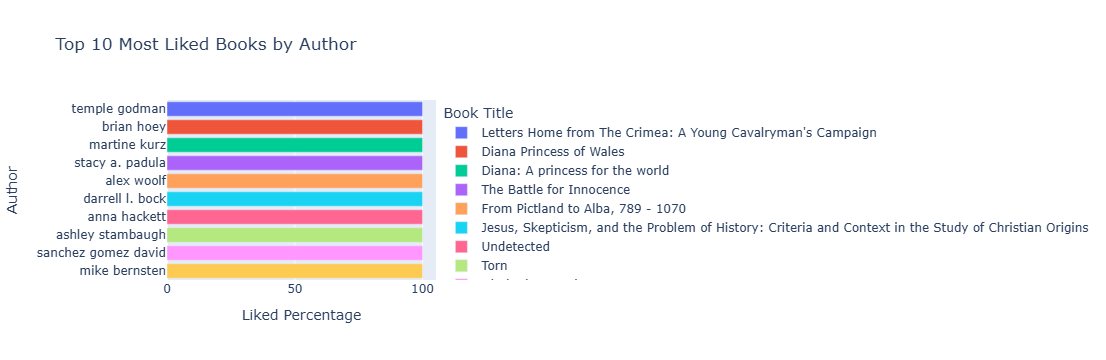

In [40]:
fig = px.bar(
    top_10_liked_books,
    x="likedPercent",
    y="author_alone",
    color="title", 
    orientation='h',
    title="Top 10 Most Liked Books by Author",
    labels={"author_alone": "Author", "likedPercent": "Liked Percentage", "title": "Book Title"}
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


Let see which book have highest BBE-Score (Best Book Ever) and there authors

In [41]:
top_10_bbescore = df.sort_values(by="bbeScore", ascending = False).head(10)

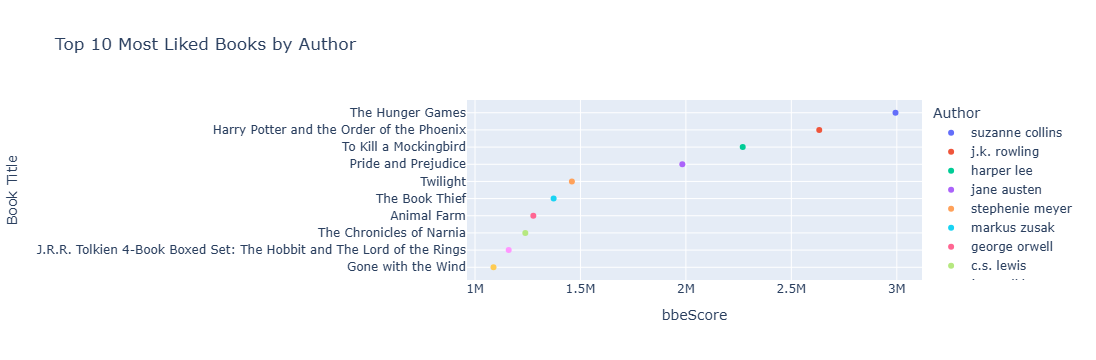

In [48]:
fig = px.scatter(
    top_10_bbescore,
    x="bbeScore",
    y="title",
    color="author_alone", 
    orientation='h',
    title="Top 10 Most Liked Books by Author",
    labels={"author_alone" : "Author", "BBE-Score" : "bbeScore", "title" : "Book Title"}
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),
)
fig.show()


Now lets find which book has the most rating 

In [43]:
most_rating = df.sort_values(by = "rating", ascending = False).head(10)

In [44]:
most_rating 

,title,author,rating,description,language,genres,pages,numRatings,likedPercent,bbeScore,bbeVotes,author_alone
11562,The Christian Self-Formation: Anthropology of Becoming,Krzysztof Stanibula,5.0,NA,Unknow,,444,2,100.0,198,2,krzysztof stanibula
11561,Addressed To Her: A Short Story,Granthana Sinha (Goodreads Author),5.0,"Being the sole bearer of the truth, and responsible for delivering a package of grave importance, Harshvardhan Singh travels to the address of the addressee, only to find himself in the midst of a celebratory household. Knowing his very life hangs by a fragile thread, will he be able to deliver the package in time, before everything he has ever known obliterates into nothingness?",Unknow,,32,5,100.0,198,2,granthana sinha
15446,Where Do I Begin?,Terri Ann Armstrong (Goodreads Author),5.0,"Where Do I Begin? is a book about my struggles with weight loss. I have struggled all my life, even from the time I was a young child. While I feel weight loss has little, if anything, to do with food directly, I do feel it has everything to do with self-esteem and self-worth. I focus largely on improving your self-esteem and finding ways to cheer yourself on in your fight against weight gain. Itas a difficult line the overweight person walks. People who have never struggled with this monster, or those who donat understand what itas all about, will come away with a better understanding of what it truly means to be overweight. This book will shed some needed light on this overwhelming problem. Americans today are heavier than ever, and it often begins in childhood. This is a book for parents, friends and children alike.",English,,110,1,100.0,160,2,terri ann armstrong
20893,Angskandh,Manoj Pandey,5.0,Fiction,Unknow,,200,4,100.0,100,1,manoj pandey
20850,The Omnidoxy,Cometan (Goodreads Author),5.0,"The Omnidoxy, solely authored by the philosopher Cometan, is the founding treatise over one million words in total length forming the conceptual, orientational, and structural foundations of Astronism. Partitioned into twelve disquisitions, each of which are further divided into hundreds of discourses, which are themselves titled by those which are known as rubrals, The Omnidoxy has been codified according to a unique writing structure known as insentence. The Omnidoxy not only forms the foundations of Astronism, but it remains the primary contributor to the wider Astronic philosophical tradition which encompasses the philosophy of Astronism. Introducing brand new philosophical concepts such as cosmocentricity, reascensionism, transcensionism, and sentientism, The Omnidoxy remains the principal signifier of a new era in philosophy. The Omnidoxy births hundreds of new belief orientations, schools of thought, neologisms, disciplines of study, theories, and concepts which, when combined and considered collectively, have formed the basis of Astronism. The authorship of The Omnidoxy rests with the single individual philosopher, Cometan, which is the mononym for the author of The Original Jesse Millette Series who began writing The Omnidoxy at the age of seventeen driven by what he terms as personal inspiration. The historical origination of The Omnidoxy rests in its authorship by Brandon Taylorian during early 21st century England, specifically in the northern county of Lancashire. Like in all textual criticism, the timing and location of the codification of The Omnidoxy is integral to understanding why and how it was written, especially by considering the influential factors impacting Taylorian during his construction of the text, particularly the cultural, political, religious, and social contexts of Taylorian's personal life and of wider society at the time. This forms an important branch of study within omnidoxicology known as omnidoxical criticism, or omnidoxical exegesis in which scholars study and investigate The Omnidoxy in order to discern conclusive judgements inspired by how, where, why, by whom, for whom, and in what circumstances

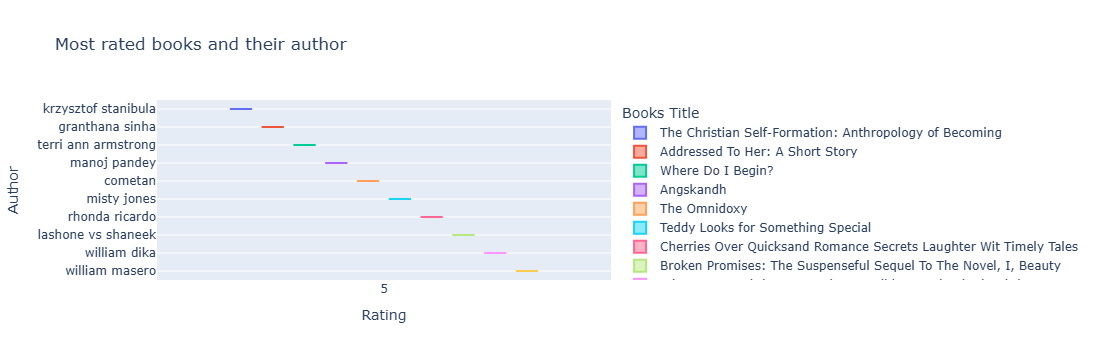

In [51]:
fig  = px.box(
    most_rating,
    x="rating",
    y="author_alone",
    color = "title",
    orientation = "v",
    title = "Most rated books and their author",
    labels = {"author_alone" : "Author", "title" : "Books Title" , "rating" : "Rating"}
)

fig.update_layout(
    yaxis=dict(autorange="reversed")
)
fig.show()

Lets find how many language books are available and there frequency 

In [47]:
print(df["language"].value_counts().sort_values(ascending=False).head(10))

language
English       42296
Unknow         3626
Arabic         1035
Spanish         682
French          573
German          506
Indonesian      366
Portuguese      359
Italian         249
Dutch           214
Name: count, dtype: int64


In [52]:
df.columns

Index(['title', 'author', 'rating', 'description', 'language', 'genres',
       'pages', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes',
       'author_alone'],
      dtype='object')